## Bureau of Economic Analysis: Application Programming Interface

Example of using the BEA's API to retrieve data on which series are available and to retrieve the values for those series.

In [1]:
import requests
import pandas as pd
import config   ## File with API key
import roman
api_key = config.bea_key

### Gather data on value parameters in order to make request

In [2]:
# Components of request
base = 'https://www.bea.gov/api/data/?&UserID={}'.format(api_key)
get_param = '&method=GetParameterValues'
dataset = '&DataSetName=GDPbyIndustry'
param = 'TableID'

In [31]:
# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

,Desc
Key,
1,Value Added by Industry (A) (Q)
5,Value Added by Industry as a Percentage of Gro...
6,Components of Value Added by Industry (A)
7,Components of Value Added by Industry as a Per...
8,Chain-Type Quantity Indexes for Value Added by...
9,Percent Changes in Chain-Type Quantity Indexes...
10,Real Value Added by Industry (A) (Q)
11,Chain-Type Price Indexes for Value Added by In...
12,Percent Changes in Chain-Type Price Indexes fo...


In [16]:
param = 'Industry'

# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

### Use parameters obtained above to request data from API

In [3]:
m = '&method=GetData'
ind = '&TableId=25'
freq = '&Frequency=A'
year = '&Year=ALL'
fmt = '&ResultFormat=json'
indus = '&Industry=23'  # Construction Industry

# Combined url for request
url = '{}{}{}{}{}{}{}{}'.format(base, m, dataset, year, indus, ind, freq, fmt)

In [4]:
r = requests.get(url).json()

In [16]:
df = pd.DataFrame(r['BEAAPI']['Results']['Data'])
df = df.replace('Construction', 'Gross Output')
df = df.set_index([pd.to_datetime(df['Year']), 'IndustrYDescription'])['DataValue'].unstack(1)
df = df.apply(pd.to_numeric)
df

IndustrYDescription,Compensation of employees,Energy inputs,Gross Output,Gross operating surplus,Intermediate inputs,Materials inputs,Purchased-services inputs,Taxes on production and imports less subsidies,Value added
Year,,,,,,,,,
1997-01-01,228.6,10.7,709.6,108.2,368.9,287.6,70.5,3.9,340.7
1998-01-01,252.9,9.6,774.5,123.2,394.1,304.8,79.7,4.4,380.5
1999-01-01,278.1,11.0,838.4,135.4,420.0,324.8,84.2,4.8,418.4
2000-01-01,307.6,15.0,911.8,149.6,449.5,340.1,94.4,5.1,462.3
2001-01-01,325.4,15.4,955.2,157.3,467.2,346.3,105.5,5.3,488.0
2002-01-01,327.0,14.6,967.9,162.1,473.1,352.2,106.3,5.7,494.9
2003-01-01,335.7,18.6,1035.1,185.3,508.0,383.7,105.6,6.1,527.1
2004-01-01,357.9,25.1,1152.5,222.9,565.0,436.0,103.9,6.7,587.5
2005-01-01,387.5,35.0,1280.1,259.3,626.0,480.6,110.4,7.3,654.1


In [17]:
df['Emp_sh'] = df['Compensation of employees'] / df['Gross operating surplus']

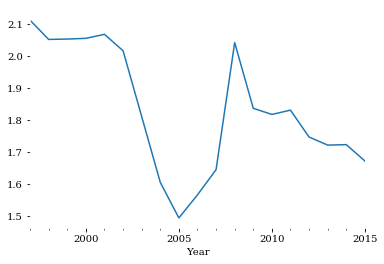

In [18]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
df['Emp_sh'].plot()

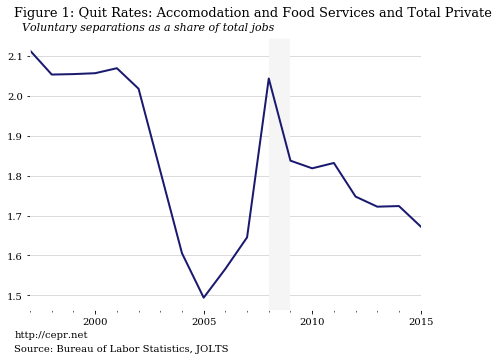

In [20]:
slist4 = ['Emp_sh']

matplotlib.rc('axes',edgecolor='white')
plt.rc('axes', axisbelow=True)
plt.rcParams['font.family'] = 'serif'

df[slist4].dropna().plot(figsize=(7, 5), legend=None, lw=2, color='midnightblue')

plt.grid(axis='y', color='lightgray')

# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='whitesmoke')

plt.xlabel('')
#plt.text(570, 4.0, 'Accommodation and \n Food Services', size=9)
#plt.text(570, 2.1, 'Total Private', size=9)
#plt.text(570, 68, 'Manufacturing', size=9)
plt.annotate('Figure 1: Quit Rates: Accomodation and Food Services and Total Private', xy=(-0.04, 1.08), xycoords='axes fraction',size=13)
plt.annotate('Voluntary separations as a share of total jobs', xy=(-0.02, 1.03), xycoords='axes fraction', size=11, style='italic')
plt.annotate('http://cepr.net', xy=(-0.04, -0.1), xycoords='axes fraction')
plt.annotate('Source: Bureau of Labor Statistics, JOLTS', xy=(-0.04, -0.15), xycoords='axes fraction')
#plt.savefig('quit_rates.png', bbox_inches='tight')

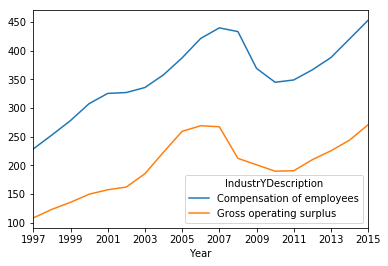

In [9]:
df[['Compensation of employees', 'Gross operating surplus']].plot()